# Lab 5: More about EDA & Tidy Data


Brian Manzo 

Wednesday 8:30-9:50am, 2260 USB

## Reminders
1. Midterm starts tomorrow
2. Homework due tomorrow

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## `gather` and `spread`

Remember that `gather` transforms datasets from "wide" to "long," collecting different column names into a variable. `spread` does the opposite, turning "long" datasets into "wide" ones by spreading out a variable's values into the column names.

In [3]:
grades_wide = tribble(
  ~name,  ~`2015`, ~`2016`, ~`2017`,
'Roger',       83,      89,      93,
  'Jon',       92,      90,      93)
grades_wide

name,2015,2016,2017
Roger,83,89,93
Jon,92,90,93


In [4]:
grades_wide %>% select(-name) %>% summarise_all(mean) 

2015,2016,2017
87.5,89.5,93


In [8]:
grades_long = grades_wide %>% gather(key=year, value=grade, `2015`:`2017`)
grades_long

name,year,grade
Roger,2015,83
Jon,2015,92
Roger,2016,89
Jon,2016,90
Roger,2017,93
Jon,2017,93


In [9]:
grades_long %>% spread(key=year, value=grade)

name,2015,2016,2017
Jon,92,90,93
Roger,83,89,93


## Midterm Review

### Topics we've covered so far:
- Basics of R programming
- `ggplot`
- `dplyr` (data manipulation)
- visualizing distributions
- tidy data (`gather` and `spread`)

### Tips: 
- Start early 
- Make sure you have any R/Jupyter/Colab issues straightened out ahead of time
- If you are stuck, break down the problem into smaller pieces
- If your code isn't working, check the output at intermediate steps to see where things may be going wrong
- Review your old homeworks and have the solutions handy

## MLB Data

This dataset contains information for player-seasons in the American League from 2015 to 2018. For those unfamiliar with baseball:
* `PA`: Plate Appearances, the number of times a player came up to bat.
* `HR`: number of home runs.
* `BBrate`: The number of walks (BBs) as a percentage of plate appearances.
* `BB`: The number of walks.
* `K`: The number of strikeouts.
* `AVG`: A batters batting average.
* `FB`: The number of fly balls a batter hit.

Note: Also recall the functions `unite`, `separate`, and `complete`.

In [10]:
mlb = read_csv('https://raw.githubusercontent.com/bmanzo/stats306_labs/master/lab05/mlb.csv')
head(mlb)

Parsed with column specification:
cols(
  year = col_double(),
  name = col_character(),
  team = col_character(),
  division = col_character(),
  PA = col_double(),
  HR = col_double(),
  BBrate = col_character(),
  BB_K = col_character(),
  AVG = col_double(),
  FB = col_double(),
  playerid = col_double()
)


year,name,team,division,PA,HR,BBrate,BB_K,AVG,FB,playerid
2016,Abraham Almonte,Indians,Central,194,1,4.1 %,8/42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,10.3 %,20/46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.0 %,0/2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.0 %,0/4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.0 %,0/0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,4.8 %,1/5,0.211,7,9682


### Problem 1

Calculate the HR per FB rate for each team and year. Convert this to a long dataset, so your variables should be `division`, `team`, and `2015`-`2018`, where values are the HR/FB rate. Note that you should ensure that `division` is still in the dataset.

Create a variable called `increased`, which checks if the HR/FB rate was higher in 2018 than it was in 2015 for that team.

In [17]:
prob1 = mlb %>% 
group_by(division, team, year) %>% 
summarise(hr_fb = sum(HR)/sum(FB)) %>% 
spread(key=year, hr_fb) %>% 
mutate(increased = `2018` > `2015`)
head(prob1)

`summarise()` regrouping output by 'division', 'team' (override with `.groups` argument)


division,team,2015,2016,2017,2018,increased
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849,TRUE
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635,TRUE
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314,FALSE
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494,FALSE
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620,TRUE
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264,FALSE


Turn this back into a "long" dataset and create a plot of HR/FB rate on year. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

In [19]:
prob1a = prob1 %>% gather(key = year, value=hr_fb, `2015`:`2018`)

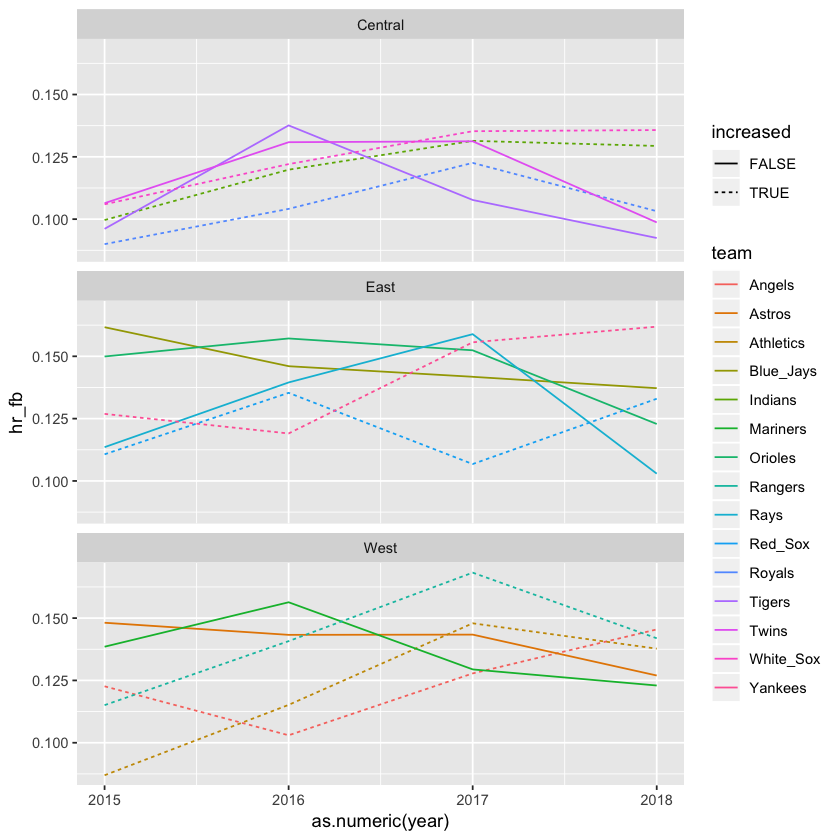

In [26]:
ggplot(prob1a, aes(x=as.numeric(year), y=hr_fb)) + 
geom_line(aes(color=team, linetype=increased)) + 
facet_wrap(~division, nrow=3)

### Problem 2

Go back to `mlb` and calculate total HRs and PAs per year per team. Create a wide version of this dataset. So there should be a `team` variable, then eight variables tracking values: `HR_2015`, `HR_2016`, `HR_2017`, `HR_2018`, `PA_2015`, `PA_2016`, `PA_2017`, and `PA_2018`.

Hint: Once you calculate the values you can use a `gather`, `unite`, and `spread` in that order to create the wide version.

In [34]:
prob2 = mlb %>% 
group_by(team, year) %>% 
summarise(HR=sum(HR), PA=sum(PA)) %>% 
gather(key=variable, value=value, HR, PA) %>% 
unite(var_year, variable, year) %>% 
spread(key=var_year, value=value)
print(prob2)

`summarise()` regrouping output by 'team' (override with `.groups` argument)


# A tibble: 15 x 9
# Groups:   team [15]
   team      HR_2015 HR_2016 HR_2017 HR_2018 PA_2015 PA_2016 PA_2017 PA_2018
   <chr>       <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
 1 Angels        169     155     165     192    5519    5901    5178    5336
 2 Astros        224     193     232     201    5866    5851    5984    5997
 3 Athletics     124     138     188     227    5573    4487    4687    6248
 4 Blue_Jays     211     216     209     191    5196    6015    5842    5313
 5 Indians       113     180     205     211    4758    5896    6051    6219
 6 Mariners      169     220     190     166    5002    6079    5789    5609
 7 Orioles       206     248     221     129    5363    5932    5768    4459
 8 Rangers       161     182     232     192    5727    5321    5766    6063
 9 Rays          155     191     194     102    5465    5260    5119    4719
10 Red_Sox       143     206     156     200    5490    6139    6018    5991
11 Royals        131     144     18

### Problem 3

Remove player-seasons with less than 200 `PA`. Then, for each player, calculate the change in `AVG` from the previous year to the current year and the change from the current year to the next year. Store these as two variables. If data on the previous or next year is not present, then the corresponding variable should be `NA`.

Once you have these two variables, make two plots where the `x`-axis is current year `AVG` and the `y`-axis is each of these difference variables. Can you make both plots with a single command using faceting? (Hint: you may need to do some additional data transformations to accomplish this.) What conclusions can you draw from these plots?

In [44]:
prob3 = mlb %>% 
filter(PA >= 200) %>% 
complete(playerid, year) %>% 
group_by(playerid) %>% 
arrange(playerid, year) %>%
mutate(AVG_diff = AVG - lag(AVG),
      next_AVG_diff = lead(AVG) - AVG) %>%
filter(!is.na(AVG))
head(prob3)

playerid,year,name,team,division,PA,HR,BBrate,BB_K,AVG,FB,AVG_diff,next_AVG_diff
393,2015,Victor Martinez,Tigers,Central,485,11,6.4 %,31/52,0.245,153,NA,0.044
393,2016,Victor Martinez,Tigers,Central,610,27,8.2 %,50/90,0.289,183,0.044,-0.034
393,2017,Victor Martinez,Tigers,Central,435,10,8.3 %,36/63,0.255,113,-0.034,-0.004
393,2018,Victor Martinez,Tigers,Central,508,9,6.3 %,32/49,0.251,153,-0.004,NA
454,2015,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
454,2016,Juan Uribe,Indians,Central,259,7,5.8 %,15/49,0.206,66,NA,NA


In [47]:
prob3_plot = prob3 %>% select(AVG, AVG_diff, next_AVG_diff) %>% 
gather(key=variable, value=value, AVG_diff, next_AVG_diff) %>%
filter(!is.na(value))
head(prob3_plot)

Adding missing grouping variables: `playerid`


playerid,AVG,variable,value
393,0.289,AVG_diff,0.044
393,0.255,AVG_diff,-0.034
393,0.251,AVG_diff,-0.004
639,0.300,AVG_diff,0.013
639,0.312,AVG_diff,0.012
639,0.273,AVG_diff,-0.039


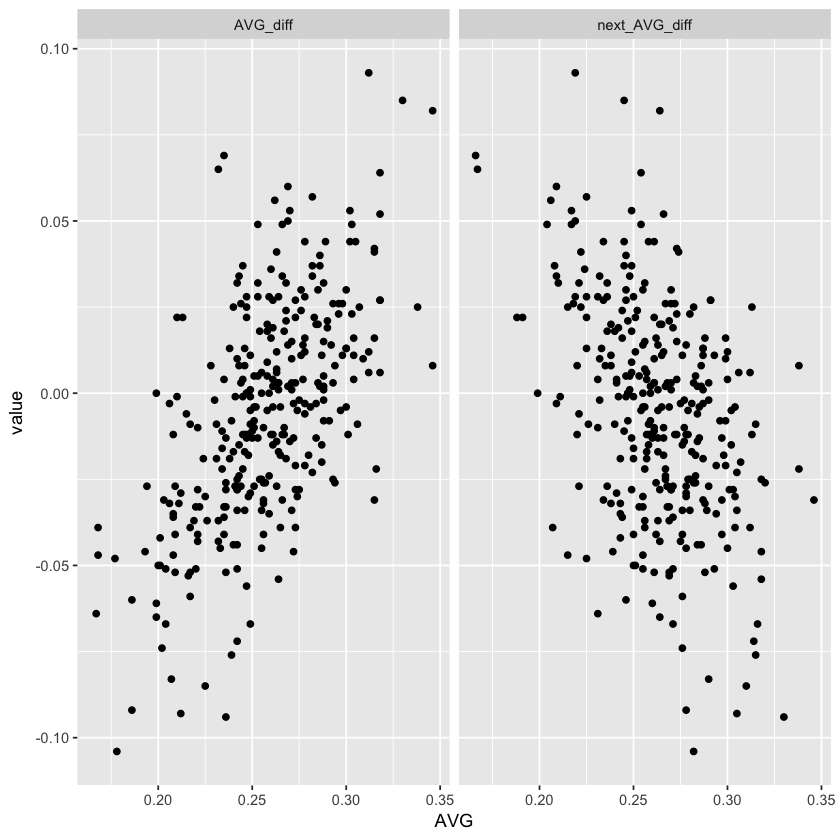

In [48]:
ggplot(prob3_plot, aes(x=AVG, y=value)) + geom_point() + facet_wrap(~variable)